# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

Importing libraries to use

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


Importing dataset

In [5]:
bike_df = pd.read_csv('bike-sharing_hourly.csv')

In [6]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Exploring data type of different features and if there are some null values:

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


No null values, but we are go to change `dteday` to datetime

In [8]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Let's group by date and by season to create some graphs and see some insisghts

In [9]:
df_date = bike_df.groupby(['dteday']).mean()
df_date = df_date.reset_index()

In [10]:
df_season = bike_df.groupby(['yr','season']).mean()
df_season = df_season.reset_index()

/var/folders/xq/n_q5kmh104s270y6h09wrhtc0000gn/T/ipykernel_8629/2200908715.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_season = bike_df.groupby(['yr','season']).mean()


In [11]:
df_hr = bike_df.groupby(['yr','hr']).sum()
df_hr = df_hr.reset_index()

/var/folders/xq/n_q5kmh104s270y6h09wrhtc0000gn/T/ipykernel_8629/2260170070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr = bike_df.groupby(['yr','hr']).sum()


In [43]:
# Group by
df_date = bike_df.groupby(['dteday']).mean()
df_date = df_date.reset_index()

df_season = bike_df.groupby(['yr','season']).mean()
df_season = df_season.reset_index()

df_weekday = bike_df.groupby(['yr','weekday','hr']).mean()
df_weekday = df_weekday.reset_index()

df_Year = bike_df.groupby(['yr']).mean()
df_Year = df_Year.reset_index()

df_hr = bike_df.groupby(['yr','hr']).sum()
df_hr = df_hr.reset_index()

## Plots: 2011

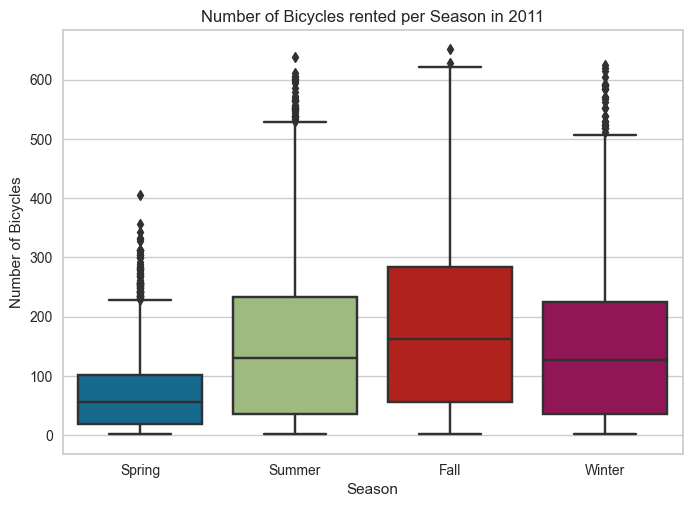

In [68]:
sns.boxplot(data= bike_df.loc[bike_df.yr==0], y = 'cnt', x = 'season')
plt.xticks(range(4), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylabel('Number of Bicycles')
plt.xlabel('Season')
plt.title('Number of Bicycles rented per Season in 2011')
plt.show()

The overall amount of users remains constant in Fall, Winter and Summer, but we see a decrease of more than 50% in Spring.

In [67]:
fig = px.bar(df_hr.loc[df_hr.yr == 0], y='cnt', x='hr', text_auto='.2s', title="Year 2011:  Number of Rented Bikes per Hour")

fig.show()

Throughout the day, while the number of rentals remains more or less constant, it increases during rush hour. It will be interesting to investigate more on this trend and verify if there is a difference between workdays and weekends.

In [63]:
fig = px.scatter(x=df_date.loc[df_date.yr == 0]['temp'], y=df_date.loc[df_date.yr == 0]['cnt'],color =df_date.loc[df_date.yr == 0]['temp'],title='Correlation of Temperature and Number of Bikes over 2011 ')
fig.show()

This plot shows us that, as expected, the number of rented bikes increases when the temperature is more "enjoyable". This is why we see a slight decrease in these numbers when the temperature gets too hot.

In [69]:
fig = px.line(df_weekday.loc[df_weekday.yr == 0], x="hr", y="cnt", color='weekday', title='2011: Bikes rented every day of the week per hour')
fig.show()

We notice that the number of rented bikes peaks on rush hour (between 8:00-9:00 and 17:00-19:00). However, this trend is inverted on weekends, where most rentals occur during the day (from 10:00 to 16:00)

## Plots: 2012

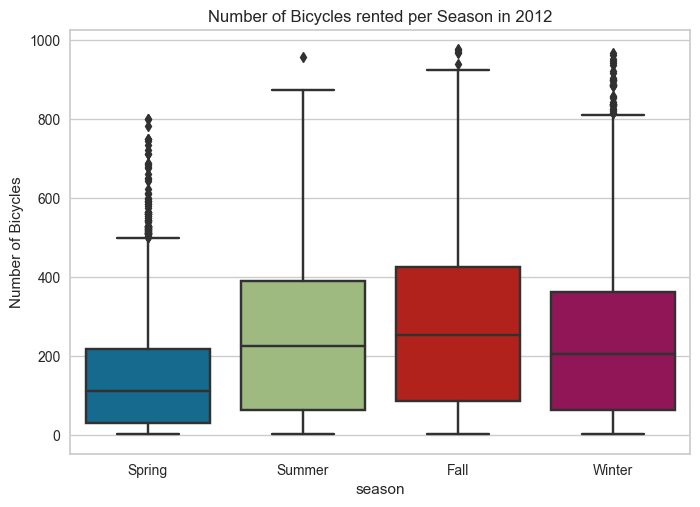

In [61]:
sns.boxplot(data= bike_df.loc[bike_df.yr==1], y = 'cnt', x = 'season')
plt.xticks(range(4), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylabel('Number of Bicycles')
plt.title('Number of Bicycles rented per Season in 2012')
plt.show()

We see in 2012 a similar seasonal trend, where the Spring season sees a 50% decrease in the amount of rented bikes.

In [66]:
fig = px.bar(df_hr.loc[df_hr.yr == 1], y='cnt', x='hr', text_auto='.2s', title="Year 2012: Number of Rented Bikes per Hour")

fig.show()

We notice again a similar hourly trend, we will dig deeper into that later to analyses the differences between weekdays and weekends.

In [70]:
df_weekday = bike_df.groupby(['yr','weekday']).sum()
df_weekday = df_weekday.reset_index()

fig = px.bar(df_weekday.loc[df_weekday.yr == 1], y='cnt', x='weekday', text_auto='.2s', title="Year 2012: Number of rented bikes per week day ")

fig.show()

Sunday is the day with the lowest number of users. The number of users then increases throughout the week and peaks on Saturday.

In [71]:
fig = px.scatter(x=df_date.loc[df_date.yr == 1]['temp'], y=df_date.loc[df_date.yr == 1]['cnt'],color =df_date.loc[df_date.yr == 1]['temp'],title='Correlation of Temperature and Number of Bikes over 2012 ')
fig.show()

This plot shows us that, as expected, the number of rented bikes increases when the temperature is more "enjoyable". This is why we see a slight decrease in these numbers when the temperature gets too hot.

In [45]:
fig = px.line(df_weekday.loc[df_weekday.yr == 1], x="hr", y="cnt", color='weekday', title='2012: Bike rented every day of the week per hour')
fig.show()

We notice that the number of rented bikes peaks on rush hour (between 8:00-9:00 and 17:00-19:00). However, this trend is inverted on weekends, where most rentals occur during the day (from 10:00 to 16:00)

## Plots: 2011 & 2012

In [19]:
fig = px.line(df_date, x='dteday', y='cnt', title='Bikes rented over 2011 and 2012')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Even though the number of rented bikes per month follows a similar distribution in 2011 and 2012, we see an increase of almost 100 daily rented bikes in 2012, which is an indicator of good performance from the company.

In [46]:
cols = ['casual','registered']
fig = px.line(df_date, x="dteday", y=cols,
              hover_data={"dteday": "|%B %d, %Y"},
              title='Casual and registered in 2011 and 2012')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Both the numbers of casual and registerd users have increased in 2012, but the proportion of casual users remains similar (arounf 20%).

In [21]:
fig = go.Figure(data=[
    go.Bar(name='casual', x=df_date['season'], y=df_date['casual']),
    go.Bar(name='registered', x=df_date['season'], y=df_date['registered'])
    
])
fig.update_layout(title='Per Season: Casual vs Registered', barmode='group')

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

We see a similar pattern on a seasonal level, both numbers of casual and registered users increase and decrease at the same time, but the proportion remains similar.

## Mapping the rentals

In [47]:
# Define mapbox access token
mapbox_access_token = 'pk.eyJ1IjoibWFoYW1haGFtIiwiYSI6ImNsZmVmbzB5NzBsdzYzdGxycDVrbGhwczkifQ.3tBOuJe1-EeMkkCUJ2BizA'

# Define the center coordinates and zoom level of the map
center_lat = 38.9072
center_lon = -77.0369
zoom = 10

# Define the locations of interest
locations = {
    'Logan Circle': {'lat': 38.9097, 'lon': -77.031978},
    'Navy Yard': {'lat': 38.8765, 'lon': -77.0006},
    'Georgetown': {'lat': 38.909675, 'lon': -77.0654},
    'Capitol hill': {'lat': 38.8860, 'lon': -76.9995},
    'Downtown': {'lat': 38.9037, 'lon': -77.0363},
    'Brightwood': {'lat': 38.9649, 'lon': -77.0277},
    'Northwest Washington': {'lat': 38.9381, 'lon': -77.0449}
}

# Define the color for each neighborhood


# Define the data for the map
data = []
for neighborhood, location in locations.items():
    data.append(go.Scattermapbox(
        lat=[location['lat']],
        lon=[location['lon']],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=20,
            symbol='circle',
            color='rgb(194, 24, 7)',
            opacity=0.8
        ),
        name=neighborhood
    ))

# Define the layout for the map

layout = go.Layout(
    title='Neighborhoods of Interest in Washington DC',
    autosize=True,
    hovermode='x',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=center_lat,
            lon=center_lon
        ),
        pitch=0,
        zoom=zoom,
        style='light'
    ),
)

# Create the figure and plot the map
fig = go.Figure(data=data, layout=layout)
fig.update_traces(showlegend=False)
fig.show()

As shown in the previous graphs, the number of users during the week is much larger at rush hour, we therefore suggest putting more bikes in residential neighbourhoods in the mornings, and in business districts during the day.

## KDE

In [22]:
cat_cols = [col for col in bike_df.columns if bike_df[col].dtype == 'object']
num_cols = [col for col in bike_df.columns if bike_df[col].dtype != 'object']
num_cols.remove("cnt")

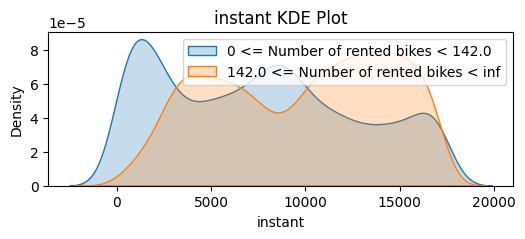

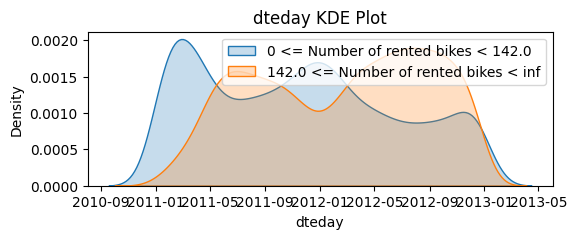

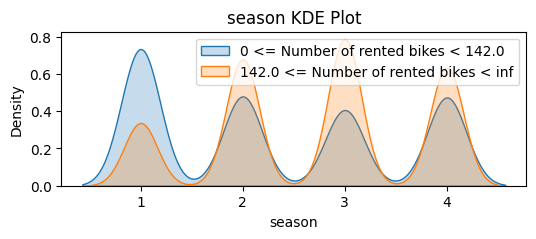

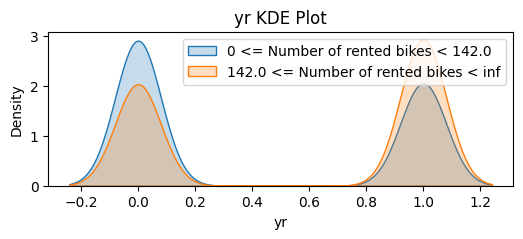

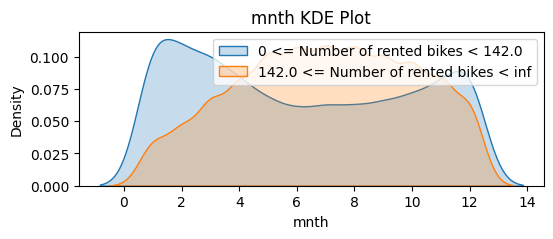

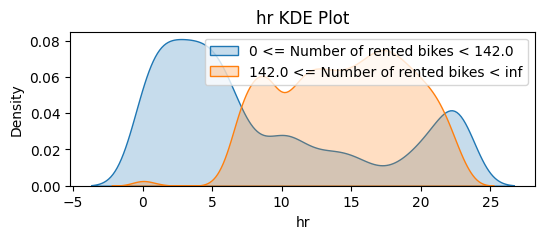

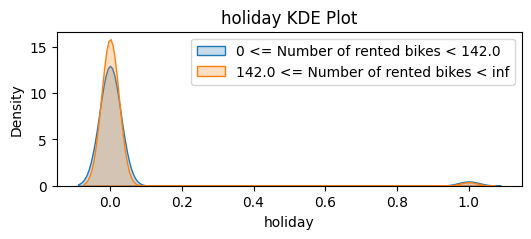

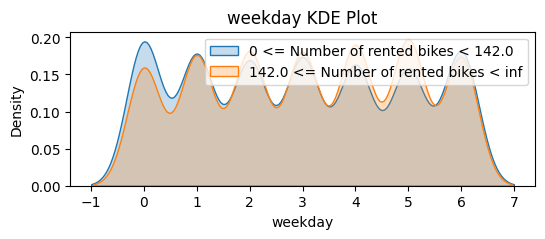

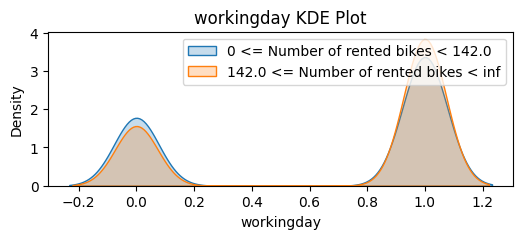

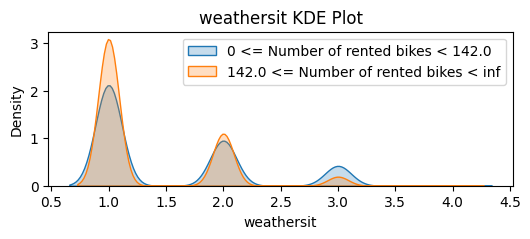

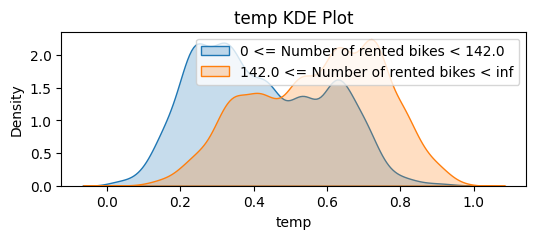

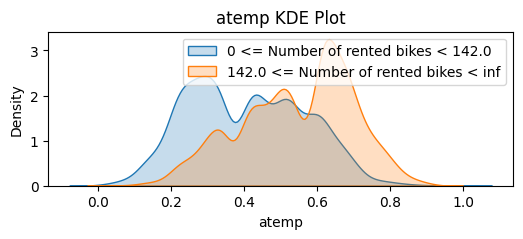

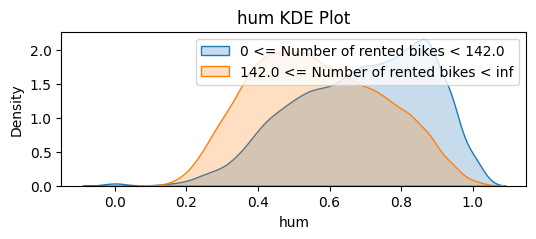

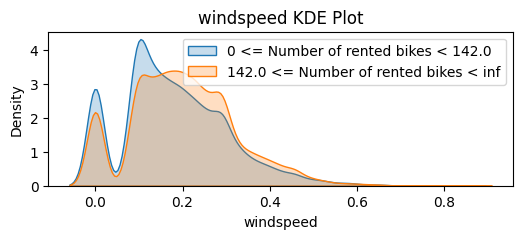

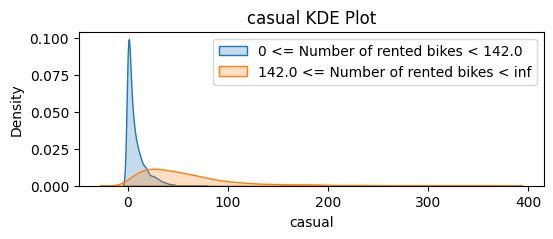

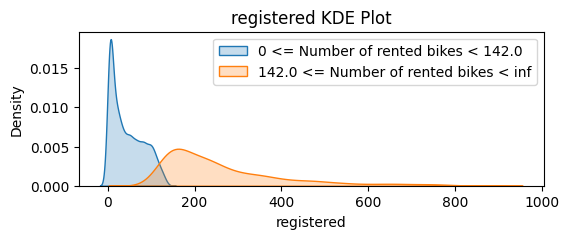

In [23]:
# Define the ranges of 'cnt' values to plot
cnt_ranges = [(0, bike_df["cnt"].median()), (bike_df["cnt"].median(), np.inf)]

for col in num_cols:
    plt.figure(figsize=(6, 2))
    for i, (cnt_min, cnt_max) in enumerate(cnt_ranges):
        subset = bike_df[(bike_df['cnt'] >= cnt_min) & (bike_df['cnt'] < cnt_max)]
        label = f'{cnt_min} <= Number of rented bikes < {cnt_max}'
        sns.kdeplot(subset[col], fill=True, label=label)
    plt.title(f"{col} KDE Plot")
    plt.legend()
    plt.show()


## Feature Engineering

In [27]:
bike_df["Working_Hours"] = np.where((bike_df["workingday"] == 1) & (bike_df["hr"] >= 8) & (bike_df["hr"] <= 17), 1 , 0)

In [28]:
bike_df["Sleeping_Hours"] = np.where(((bike_df["hr"] <= 6) | (bike_df["hr"] >= 23)), 1 , 0)

In [29]:
bike_df["hum_temp_ratio"] = bike_df["hum"] / bike_df["temp"]
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Working_Hours,Sleeping_Hours,hum_temp_ratio
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0,1,3.375000
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0,1,3.636364
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0,1,3.636364
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0,1,3.125000
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0,1,3.125000


### Insights

Some interesting insights about this dataset are "dead periods", periods of time during the day or during the year where the bike rentals drastically decrease. For example, during the week, outside rush hours, we see a decrease ofalmost 50% in the number of rented bikes. We see a similiar 50% overall decrease in the Spring season. These insights could be useful for the company to create targetted advertising and promotion to encourage people to rent more bikes during these periods.

Another insight can be found by looking at the number of "casual" users. In both years, we notice that almost 20% of users are not registered. The company should therefore look deeper into these and encourage these casual users to become registered ones.

On the other hand, these observations helped us create new features that can be useful to predict the hourly number of rented bikes. Firstly, we saw a clear distinction between day and night, and weekdays and weekend. We therefore created the features "Working_Hours", indicating whether a time point occurs between Monday and Friday, from 8:00 to 17:00, and "Sleeping_Hours" to distinguish daytime from nighttime. The other added feature "hum_temp_ratio", calculates the ratio between the humidity and the temperatures, since there is a clear correlation between the weather and the number of rented bikes.

## PART II: Prediction Model

For this part, we will compare different models using the Pycaret library. We optimize our models for $R^2$ score.

Let's start by importaing the libraries to use

In [30]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score
from pycaret.regression import *

## 1. Setup

We are going to drop columns `causl` and `registered` since the sum of this is the count of bikes and this will overfit our model

In [31]:
bike_df_data = bike_df.drop(columns = ["casual", "registered"], axis = 1)

No we split our data, in this case since we are dealing with time series, we are going to use the first year and a half for our train set and the last half year of 2012 for testing the data

In [32]:
data = bike_df_data[(bike_df_data["dteday"] >= '2011-01-01') & (bike_df_data["dteday"] < '2012-08-01')]
data_unseen = bike_df_data[(bike_df_data["dteday"] >= '2012-08-01')]

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)


We are going to use pycaret to compare the different models we can use

In [33]:
model = setup(data = data, target = "cnt", silent=True)

,Description,Value
0,session_id,3796
1,Target,cnt
2,Original Data,"(13747, 18)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9622, 40)"


**Comparing the models and sort them by the best R2**

In [34]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,23.1922,1322.5670,36.3183,0.9524,0.4294,0.4393,1.6740
lightgbm,Light Gradient Boosting Machine,24.6306,1462.5495,38.1893,0.9474,0.4117,0.4223,0.2400
xgboost,Extreme Gradient Boosting,25.2286,1528.5028,39.0215,0.9450,0.4463,0.4483,1.6700
et,Extra Trees Regressor,24.8533,1626.7266,40.2931,0.9415,0.3448,0.3174,2.9980
rf,Random Forest Regressor,25.3240,1642.7129,40.4855,0.9409,0.3530,0.3369,2.7250
dt,Decision Tree Regressor,33.7911,3154.4372,56.0638,0.8868,0.4526,0.4002,0.0740
knn,K Neighbors Regressor,38.5537,3628.9998,60.1835,0.8699,0.4533,0.5042,0.0820
gbr,Gradient Boosting Regressor,45.2197,4384.5670,66.1651,0.8428,0.6979,1.0119,0.5560
ada,AdaBoost Regressor,89.0023,10604.2271,102.9519,0.6187,1.2587,4.3044,0.5290
lr,Linear Regression,84.1421,12655.6827,112.4424,0.5463,1.0769,2.8445,0.5240


We can see that in this case the best models are `CatBoost` , `LightGBM` , `Extra Tree Regressor`, `XGBoost` and `Random Forest`

**Best model `CatBoost`**

In [35]:
best_model

In [36]:
metrics_df = get_metrics(best_model)

Now we tune the model for doing a cross validation of 5 folds, where we can see we get a mean R2 of 0.94 which is very impressive

In [49]:
tuned_model = tune_model(best_model, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.2272,1893.2549,43.5115,0.9300,0.4757,0.5767
1,27.7519,1815.3933,42.6074,0.9348,0.5154,0.6055
2,28.0225,1811.7969,42.5652,0.9369,0.5138,0.6117
3,26.6734,1747.3314,41.8011,0.9363,0.4862,0.5527
4,25.8738,1497.5328,38.6980,0.9460,0.4894,0.5781
Mean,27.1097,1753.0619,41.8367,0.9368,0.4961,0.5850
Std,0.7717,135.8801,1.6603,0.0052,0.0158,0.0214


In [63]:
predictions = predict_model(tuned_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,43.4606,4311.6854,65.6634,0.9114,0.5073,0.5319


In [64]:
predictions["Prediction"] = predictions["Label"].round()
predictions.drop(columns = "Label", axis =1, inplace = True)
r2 = r2_score(predictions["cnt"], predictions["Prediction"].round())
print(f"R2 score: {r2}")

R2 score: 0.9113837465283209


We can see that now, predicting in the new data from August to Decemeber 2012, the R2 is 0.91. The score is lower than the one we saw in the cross-validation, this can be because dealing with timeseries, every year can be different, so we consider normal this behavior. Still 0.91 is a really good score.

**Random Forest**

In [35]:
rf_model = create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.0163,2024.6750,44.9964,0.9252,0.3693,0.3698
1,27.2069,1995.9678,44.6763,0.9283,0.3727,0.3535
2,26.8844,1803.1761,42.4638,0.9372,0.3577,0.3366
3,26.8279,1817.1799,42.6284,0.9338,0.3721,0.3710
4,26.4535,1796.3491,42.3834,0.9352,0.3579,0.3382
Mean,26.8778,1887.4696,43.4296,0.9319,0.3659,0.3538
Std,0.2490,100.9418,1.1557,0.0045,0.0067,0.0148


In [43]:
predictions_rf = predict_model(rf_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,51.6403,6116.7603,78.2097,0.8743,0.4083,0.3463


**Linear Rgeression**

In [37]:
lr_model = create_model('lr', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,83.8271,12784.7727,113.0698,0.5276,1.0660,2.8059
1,84.5836,12779.3600,113.0458,0.5412,1.0613,2.8261
2,86.0084,13295.6492,115.3068,0.5371,1.1091,2.9424
3,84.1291,12490.8541,111.7625,0.5447,1.0750,2.9102
4,83.0776,12134.1874,110.1553,0.5623,1.0644,2.6323
Mean,84.3252,12696.9647,112.6680,0.5426,1.0751,2.8234
Std,0.9740,382.6545,1.6971,0.0114,0.0176,0.1082


In [38]:
predictions_lr = predict_model(lr_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,118.1211,25511.3175,159.7226,0.4759,1.0858,2.5502


**Continue with Best Model - CatBoost**

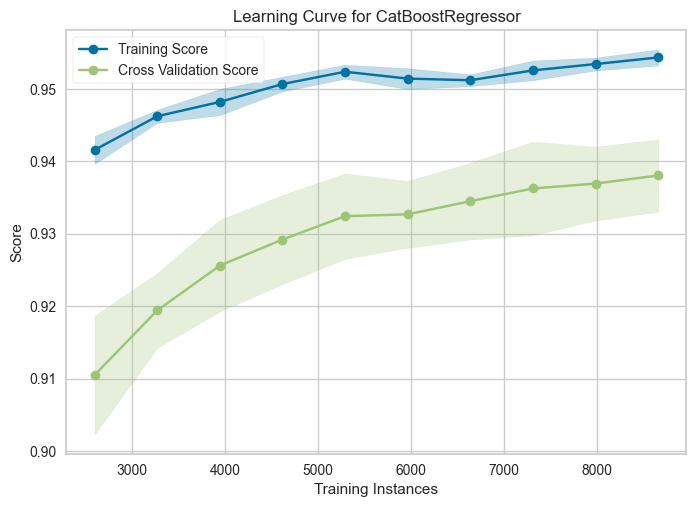

In [51]:
# plot the Linear Regression model to check for overfitting
plot_model(tuned_model, plot='learning')

The training score is always slightly higher than the validation score, indicating that the model is not prone to overfitting.

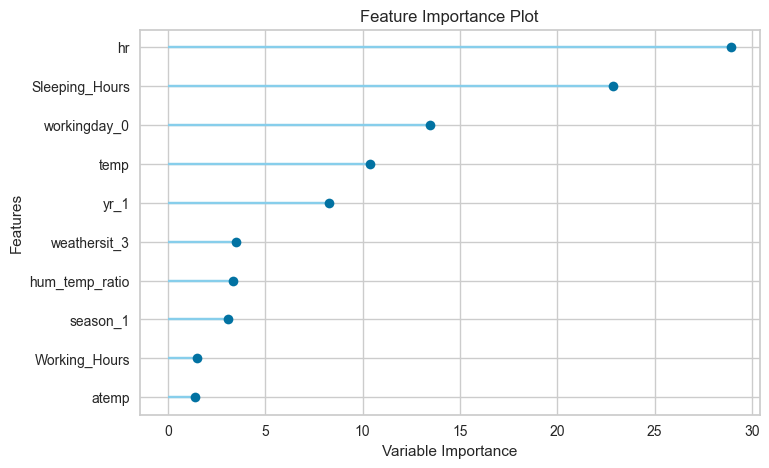

In [50]:
# Feature Importance Plot
plot_model(tuned_model, plot='feature')

This graph shows us the importance of each feature in the Random Forest model. The most important variable is the time (both overall time of the day and the fact that it is night time or not), followed by workingday (is it during the week or on weekends?). On the other hand, the least important variable is the outside temperature.

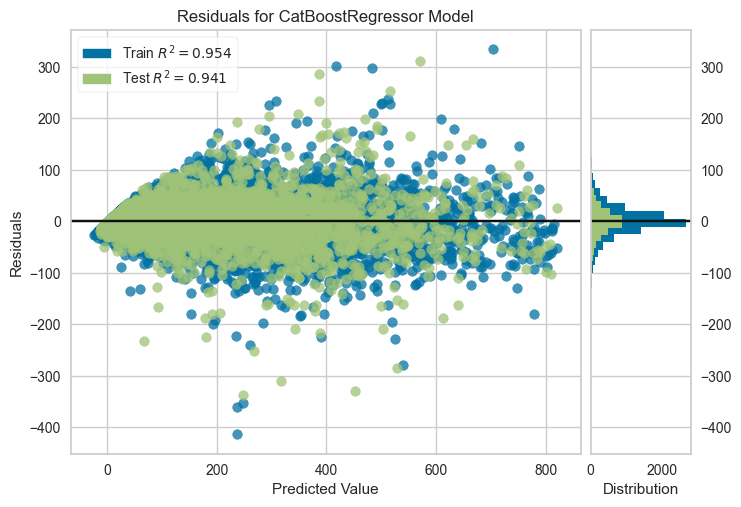

In [52]:
# Residual Plot
plot_model(tuned_model, plot='residuals')

The training and testing dataset's residuals follow similiar distribution, indicating that the model is neither underfitting nor overfitting.

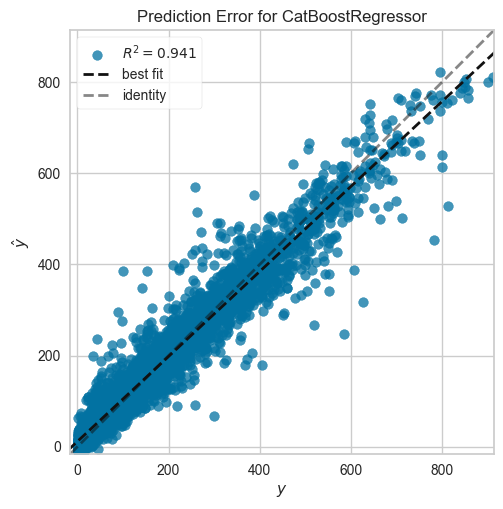

In [54]:
# Prediction Error Plot
plot_model(tuned_model, plot='error')

For Catboost, the prediction error is constant accross the dataset.

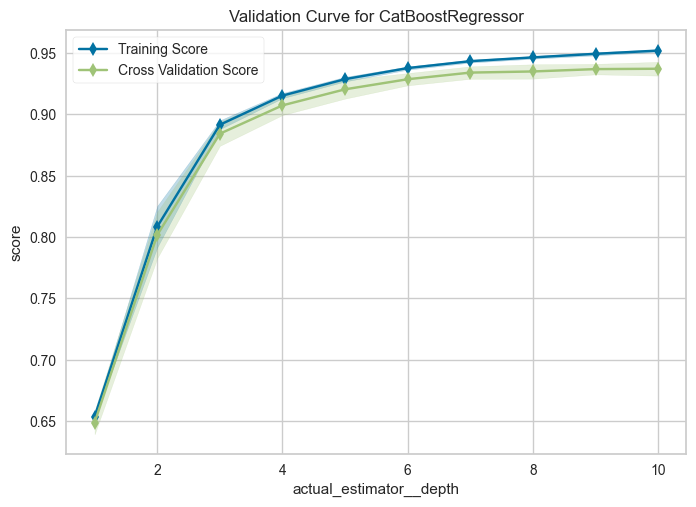

In [56]:
# Validation Curve
plot_model(tuned_model, plot='vc')

The validation curve of our Catboost model follows the same trend as the training curve, always being slightly lowr. This indicates that the model is not overfitting.

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###